## Wine prediction.
Here we will use the  Wine Quality Dataset from the UCI machine learning repository.  It has separate datasets for red wine and white wine
Here, we will combine the  datasets to predict the wine quality and whether the wine is red or white solely from the attributes.

we will model wine quality estimations as a regression problem and wine type detection as a binary classification problem.

In [1]:
# Import 
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import utils
import csv

In [2]:
# Import the white data.
archive="winequality-white.csv"
reader=pd.read_csv(archive,sep=";")
reader["is_red"]=0
reader

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [3]:
# We remove duplicates
white_df = reader.drop_duplicates(keep='first')
print(white_df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
6               6.2              0.32         0.16             7.0      0.045   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

In [4]:
# The % of alcohol of some items
white_df.alcohol[0]
white_df.alcohol[100]

9.1

In [5]:
# Pre process Red wine.
# load red Wine.
reade="winequality-red.csv"
red_df= pd.read_csv(reade,sep=";")
red_df["is_red"]=1
red_df= red_df.drop_duplicates(keep="first")
red_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


In [6]:
# concatenate Data (red,white)
mix= pd.concat([red_df,white_df],ignore_index=True)
mix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


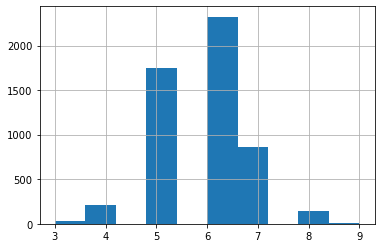

In [7]:
# Quality diagram:
mix["quality"].hist();

In [8]:
# we have to remove some dates not relevant like 3,4,8,9
mix= mix[(mix["quality"]>4) & (mix["quality"]<8)]
mix
# # reset index and drop the old one
mix = mix.reset_index(drop=True)
mix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4926,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4927,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4928,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4929,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


<AxesSubplot:>

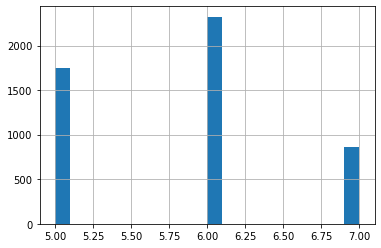

In [9]:
# Quality Diagram
mix["quality"].hist(bins=20)

In [10]:
# split in train, test and validation

In [11]:
# split in train, test and validation:
train,test= train_test_split(mix,test_size=0.2,random_state=1)
train,val= train_test_split(train,test_size=0.2,random_state=1)

In [12]:
# Explore the training stats
train_stats= train.describe()
train_stats

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
count,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000
mean,7.221616,0.338929,0.321569,5.155911,0.056976,30.388590,115.062282,0.994633,3.223201,0.534051,10.504466,5.813629,0.255784
std,1.325297,0.162476,0.147970,4.639632,0.036802,17.236784,56.706617,0.003005,0.161272,0.149149,1.154654,0.701121,0.436370
min,3.800000,0.080000,0.000000,0.600000,0.012000,1.000000,6.000000,0.987110,2.720000,0.220000,8.500000,5.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,75.000000,0.992320,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,2.800000,0.047000,28.000000,117.000000,0.994810,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.400000,7.650000,0.066000,41.000000,156.000000,0.996800,3.330000,0.600000,11.300000,6.000000,1.000000
max,15.600000,1.240000,1.660000,65.800000,0.611000,131.000000,344.000000,1.038980,4.010000,1.950000,14.000000,7.000000,1.000000


In [13]:
train_stats.pop("is_red")
train_stats.pop("quality")
train_stats= train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
fixed acidity,3155.0,7.221616,1.325297,3.80000,6.40000,7.00000,7.7000,15.60000
volatile acidity,3155.0,0.338929,0.162476,0.08000,0.23000,0.29000,0.4000,1.24000
citric acid,3155.0,0.321569,0.147970,0.00000,0.25000,0.31000,0.4000,1.66000
residual sugar,3155.0,5.155911,4.639632,0.60000,1.80000,2.80000,7.6500,65.80000
chlorides,3155.0,0.056976,0.036802,0.01200,0.03800,0.04700,0.0660,0.61100
free sulfur dioxide,3155.0,30.388590,17.236784,1.00000,17.00000,28.00000,41.0000,131.00000
total sulfur dioxide,3155.0,115.062282,56.706617,6.00000,75.00000,117.00000,156.0000,344.00000
density,3155.0,0.994633,0.003005,0.98711,0.99232,0.99481,0.9968,1.03898
pH,3155.0,3.223201,0.161272,2.72000,3.11000,3.21000,3.3300,4.01000
sulphates,3155.0,0.534051,0.149149,0.22000,0.43000,0.51000,0.6000,1.95000


In [14]:
## get label
def format_output(data):
    is_red = data.pop('is_red')
    is_red = np.array(is_red)
    quality = data.pop('quality')
    quality = np.array(quality)
    return (quality, is_red)

In [15]:
train_Y= format_output(train)
val_Y= format_output(val)
test_Y= format_output(test)

In [16]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
225,7.5,0.65,0.18,7.0,0.088,27.0,94.0,0.99915,3.38,0.77,9.4
3557,6.3,0.27,0.29,12.2,0.044,59.0,196.0,0.99782,3.14,0.40,8.8
3825,8.8,0.27,0.25,5.0,0.024,52.0,99.0,0.99250,2.87,0.49,11.4
1740,6.4,0.45,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8
1221,7.2,0.53,0.13,2.0,0.058,18.0,22.0,0.99573,3.21,0.68,9.9


In [17]:
# Normalize the data.
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

In [18]:
norm_train_X= norm(train)
norm_val_X= norm(val)
norm_test_X= norm(test)

## Model
Using the Functional API

In [19]:
def base_model(inputs):
    x = tf.keras.layers.Dense(128, activation="relu")(inputs)
    x = tf.keras.layers.Dense(128,activation="relu")(x)
    return x
    

In [20]:
# two outsites (quality and wine_type)
def final_model(inputs):
    x= base_model(inputs)
    wine_quality= tf.keras.layers.Dense(1,name="wine_quality")(x)
    wine_type= tf.keras.layers.Dense(1,activation="sigmoid",name="wine_type")(x)
    
    model= Model(inputs=[inputs],outputs=[wine_quality,wine_type])
    return model

In [21]:
inputs= tf.keras.layers.Input(shape=(11,))
rms = tf.keras.optimizers.RMSprop(lr=0.0001)
model= final_model(inputs)
model.compile(optimizer= rms,
             loss={"wine_type":"binary_crossentropy",
                   "wine_quality":"mse"}, metrics={ "wine_type":"accuracy",
                                                   "wine_quality":tf.keras.metrics.RootMeanSquaredError()})          

In [22]:
history= model.fit(norm_train_X,train_Y, epochs=180,validation_data=[norm_test_X,test_Y])

Epoch 1/180
99/99 [==============================] - 1s 7ms/step - loss: 24.2331 - wine_quality_loss: 23.5069 - wine_type_loss: 0.7262 - wine_quality_root_mean_squared_error: 4.8484 - wine_type_accuracy: 0.3521 - val_loss: 0.0000e+00 - val_wine_quality_loss: 0.0000e+00 - val_wine_type_loss: 0.0000e+00 - val_wine_quality_root_mean_squared_error: 0.0000e+00 - val_wine_type_accuracy: 0.0000e+00
Epoch 2/180
99/99 [==============================] - 0s 3ms/step - loss: 10.3981 - wine_quality_loss: 9.7521 - wine_type_loss: 0.6461 - wine_quality_root_mean_squared_error: 3.1228 - wine_type_accuracy: 0.6808 - val_loss: 0.0000e+00 - val_wine_quality_loss: 0.0000e+00 - val_wine_type_loss: 0.0000e+00 - val_wine_quality_root_mean_squared_error: 0.0000e+00 - val_wine_type_accuracy: 0.0000e+00
Epoch 3/180
99/99 [==============================] - 0s 3ms/step - loss: 4.0291 - wine_quality_loss: 3.4975 - wine_type_loss: 0.5315 - wine_quality_root_mean_squared_error: 1.8702 - wine_type_accuracy: 0.7880 - 

Epoch 22/180
99/99 [==============================] - 0s 2ms/step - loss: 0.6426 - wine_quality_loss: 0.6040 - wine_type_loss: 0.0386 - wine_quality_root_mean_squared_error: 0.7772 - wine_type_accuracy: 0.9924 - val_loss: 0.0000e+00 - val_wine_quality_loss: 0.0000e+00 - val_wine_type_loss: 0.0000e+00 - val_wine_quality_root_mean_squared_error: 0.0000e+00 - val_wine_type_accuracy: 0.0000e+00
Epoch 23/180
99/99 [==============================] - 0s 2ms/step - loss: 0.6103 - wine_quality_loss: 0.5727 - wine_type_loss: 0.0376 - wine_quality_root_mean_squared_error: 0.7568 - wine_type_accuracy: 0.9924 - val_loss: 0.0000e+00 - val_wine_quality_loss: 0.0000e+00 - val_wine_type_loss: 0.0000e+00 - val_wine_quality_root_mean_squared_error: 0.0000e+00 - val_wine_type_accuracy: 0.0000e+00
Epoch 24/180
99/99 [==============================] - 0s 3ms/step - loss: 0.5822 - wine_quality_loss: 0.5454 - wine_type_loss: 0.0368 - wine_quality_root_mean_squared_error: 0.7385 - wine_type_accuracy: 0.9924 - 

99/99 [==============================] - 0s 2ms/step - loss: 0.3691 - wine_quality_loss: 0.3397 - wine_type_loss: 0.0294 - wine_quality_root_mean_squared_error: 0.5829 - wine_type_accuracy: 0.9943 - val_loss: 0.0000e+00 - val_wine_quality_loss: 0.0000e+00 - val_wine_type_loss: 0.0000e+00 - val_wine_quality_root_mean_squared_error: 0.0000e+00 - val_wine_type_accuracy: 0.0000e+00
Epoch 43/180
99/99 [==============================] - 0s 2ms/step - loss: 0.3670 - wine_quality_loss: 0.3379 - wine_type_loss: 0.0291 - wine_quality_root_mean_squared_error: 0.5813 - wine_type_accuracy: 0.9943 - val_loss: 0.0000e+00 - val_wine_quality_loss: 0.0000e+00 - val_wine_type_loss: 0.0000e+00 - val_wine_quality_root_mean_squared_error: 0.0000e+00 - val_wine_type_accuracy: 0.0000e+00
Epoch 44/180
99/99 [==============================] - ETA: 0s - loss: 0.3598 - wine_quality_loss: 0.3292 - wine_type_loss: 0.0305 - wine_quality_root_mean_squared_error: 0.5738 - wine_type_accuracy: 0.99 - 0s 2ms/step - loss:

99/99 [==============================] - 0s 2ms/step - loss: 0.3307 - wine_quality_loss: 0.3054 - wine_type_loss: 0.0253 - wine_quality_root_mean_squared_error: 0.5526 - wine_type_accuracy: 0.9949 - val_loss: 0.0000e+00 - val_wine_quality_loss: 0.0000e+00 - val_wine_type_loss: 0.0000e+00 - val_wine_quality_root_mean_squared_error: 0.0000e+00 - val_wine_type_accuracy: 0.0000e+00
Epoch 63/180
99/99 [==============================] - 0s 3ms/step - loss: 0.3295 - wine_quality_loss: 0.3043 - wine_type_loss: 0.0253 - wine_quality_root_mean_squared_error: 0.5516 - wine_type_accuracy: 0.9949 - val_loss: 0.0000e+00 - val_wine_quality_loss: 0.0000e+00 - val_wine_type_loss: 0.0000e+00 - val_wine_quality_root_mean_squared_error: 0.0000e+00 - val_wine_type_accuracy: 0.0000e+00
Epoch 64/180
99/99 [==============================] - 0s 2ms/step - loss: 0.3280 - wine_quality_loss: 0.3029 - wine_type_loss: 0.0251 - wine_quality_root_mean_squared_error: 0.5504 - wine_type_accuracy: 0.9952 - val_loss: 0.0

99/99 [==============================] - 0s 4ms/step - loss: 0.3136 - wine_quality_loss: 0.2910 - wine_type_loss: 0.0226 - wine_quality_root_mean_squared_error: 0.5394 - wine_type_accuracy: 0.9959 - val_loss: 0.0000e+00 - val_wine_quality_loss: 0.0000e+00 - val_wine_type_loss: 0.0000e+00 - val_wine_quality_root_mean_squared_error: 0.0000e+00 - val_wine_type_accuracy: 0.0000e+00
Epoch 83/180
99/99 [==============================] - 0s 3ms/step - loss: 0.3133 - wine_quality_loss: 0.2908 - wine_type_loss: 0.0226 - wine_quality_root_mean_squared_error: 0.5392 - wine_type_accuracy: 0.9959 - val_loss: 0.0000e+00 - val_wine_quality_loss: 0.0000e+00 - val_wine_type_loss: 0.0000e+00 - val_wine_quality_root_mean_squared_error: 0.0000e+00 - val_wine_type_accuracy: 0.0000e+00
Epoch 84/180
99/99 [==============================] - 0s 2ms/step - loss: 0.3121 - wine_quality_loss: 0.2897 - wine_type_loss: 0.0224 - wine_quality_root_mean_squared_error: 0.5382 - wine_type_accuracy: 0.9959 - val_loss: 0.0

Epoch 103/180
99/99 [==============================] - 0s 3ms/step - loss: 0.3002 - wine_quality_loss: 0.2797 - wine_type_loss: 0.0205 - wine_quality_root_mean_squared_error: 0.5289 - wine_type_accuracy: 0.9959 - val_loss: 0.0000e+00 - val_wine_quality_loss: 0.0000e+00 - val_wine_type_loss: 0.0000e+00 - val_wine_quality_root_mean_squared_error: 0.0000e+00 - val_wine_type_accuracy: 0.0000e+00
Epoch 104/180
99/99 [==============================] - 0s 3ms/step - loss: 0.2999 - wine_quality_loss: 0.2795 - wine_type_loss: 0.0204 - wine_quality_root_mean_squared_error: 0.5287 - wine_type_accuracy: 0.9959 - val_loss: 0.0000e+00 - val_wine_quality_loss: 0.0000e+00 - val_wine_type_loss: 0.0000e+00 - val_wine_quality_root_mean_squared_error: 0.0000e+00 - val_wine_type_accuracy: 0.0000e+00
Epoch 105/180
99/99 [==============================] - 0s 3ms/step - loss: 0.3010 - wine_quality_loss: 0.2808 - wine_type_loss: 0.0202 - wine_quality_root_mean_squared_error: 0.5299 - wine_type_accuracy: 0.9959

Epoch 124/180
99/99 [==============================] - 0s 3ms/step - loss: 0.2900 - wine_quality_loss: 0.2713 - wine_type_loss: 0.0186 - wine_quality_root_mean_squared_error: 0.5209 - wine_type_accuracy: 0.9959 - val_loss: 0.0000e+00 - val_wine_quality_loss: 0.0000e+00 - val_wine_type_loss: 0.0000e+00 - val_wine_quality_root_mean_squared_error: 0.0000e+00 - val_wine_type_accuracy: 0.0000e+00
Epoch 125/180
99/99 [==============================] - 0s 3ms/step - loss: 0.2902 - wine_quality_loss: 0.2717 - wine_type_loss: 0.0185 - wine_quality_root_mean_squared_error: 0.5213 - wine_type_accuracy: 0.9959 - val_loss: 0.0000e+00 - val_wine_quality_loss: 0.0000e+00 - val_wine_type_loss: 0.0000e+00 - val_wine_quality_root_mean_squared_error: 0.0000e+00 - val_wine_type_accuracy: 0.0000e+00
Epoch 126/180
99/99 [==============================] - 0s 3ms/step - loss: 0.2899 - wine_quality_loss: 0.2714 - wine_type_loss: 0.0184 - wine_quality_root_mean_squared_error: 0.5210 - wine_type_accuracy: 0.9959

Epoch 145/180
99/99 [==============================] - 0s 3ms/step - loss: 0.2807 - wine_quality_loss: 0.2637 - wine_type_loss: 0.0170 - wine_quality_root_mean_squared_error: 0.5135 - wine_type_accuracy: 0.9965 - val_loss: 0.0000e+00 - val_wine_quality_loss: 0.0000e+00 - val_wine_type_loss: 0.0000e+00 - val_wine_quality_root_mean_squared_error: 0.0000e+00 - val_wine_type_accuracy: 0.0000e+00
Epoch 146/180
99/99 [==============================] - 0s 3ms/step - loss: 0.2803 - wine_quality_loss: 0.2633 - wine_type_loss: 0.0170 - wine_quality_root_mean_squared_error: 0.5131 - wine_type_accuracy: 0.9965 - val_loss: 0.0000e+00 - val_wine_quality_loss: 0.0000e+00 - val_wine_type_loss: 0.0000e+00 - val_wine_quality_root_mean_squared_error: 0.0000e+00 - val_wine_type_accuracy: 0.0000e+00
Epoch 147/180
99/99 [==============================] - 0s 3ms/step - loss: 0.2800 - wine_quality_loss: 0.2631 - wine_type_loss: 0.0169 - wine_quality_root_mean_squared_error: 0.5129 - wine_type_accuracy: 0.9965

Epoch 166/180
99/99 [==============================] - 0s 3ms/step - loss: 0.2720 - wine_quality_loss: 0.2563 - wine_type_loss: 0.0157 - wine_quality_root_mean_squared_error: 0.5062 - wine_type_accuracy: 0.9971 - val_loss: 0.0000e+00 - val_wine_quality_loss: 0.0000e+00 - val_wine_type_loss: 0.0000e+00 - val_wine_quality_root_mean_squared_error: 0.0000e+00 - val_wine_type_accuracy: 0.0000e+00
Epoch 167/180
99/99 [==============================] - 0s 3ms/step - loss: 0.2713 - wine_quality_loss: 0.2556 - wine_type_loss: 0.0157 - wine_quality_root_mean_squared_error: 0.5056 - wine_type_accuracy: 0.9968 - val_loss: 0.0000e+00 - val_wine_quality_loss: 0.0000e+00 - val_wine_type_loss: 0.0000e+00 - val_wine_quality_root_mean_squared_error: 0.0000e+00 - val_wine_type_accuracy: 0.0000e+00
Epoch 168/180
99/99 [==============================] - 0s 3ms/step - loss: 0.2725 - wine_quality_loss: 0.2568 - wine_type_loss: 0.0156 - wine_quality_root_mean_squared_error: 0.5068 - wine_type_accuracy: 0.9968

In [23]:
# Gather the training metrics
loss, wine_quality_loss, wine_type_loss, wine_quality_rmse, wine_type_accuracy=model.evaluate(x=norm_val_X, y=val_Y)
print(f'loss: {loss}')
print(f'wine_quality_loss: {wine_quality_loss}')
print(f'wine_type_loss: {wine_type_loss}')
print(f'wine_quality_rmse: {wine_quality_rmse}')
print(f'wine_type_accuracy: {wine_type_accuracy}')

25/25 [==============================] - 0s 2ms/step - loss: 0.3368 - wine_quality_loss: 0.3120 - wine_type_loss: 0.0248 - wine_quality_root_mean_squared_error: 0.5586 - wine_type_accuracy: 0.9949
loss: 0.33682796359062195
wine_quality_loss: 0.3120346963405609
wine_type_loss: 0.024793250486254692
wine_quality_rmse: 0.558600664138794
wine_type_accuracy: 0.9949302673339844


In [24]:
# Analyze the model performance
# The output at index 0 is quality and index 1 is wine type
predictions = model.predict(norm_test_X)
quality_pred = predictions[0]
type_pred = predictions[1]

In [25]:
print(quality_pred[0])
print(type_pred[0])

[5.5737467]
[0.0001651]


## plots

In [26]:
def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0,ylim)
    plt.plot(history.history[metric_name],color='blue',label=metric_name)
    plt.plot(history.history['val_' + metric_name],color='green',label='val_' + metric_name)

In [27]:
def plot_confusion_matrix(y_true, y_pred, title='', labels=[0,1]):
    cm = confusion_matrix(y_true, y_pred)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, format(cm[i, j], fmt),
                  horizontalalignment="center",
                  color="black" if cm[i, j] > thresh else "white")
    plt.show()

In [28]:
def plot_diff(y_true, y_pred, title = '' ):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.plot([-100, 100], [-100, 100])
    return plt

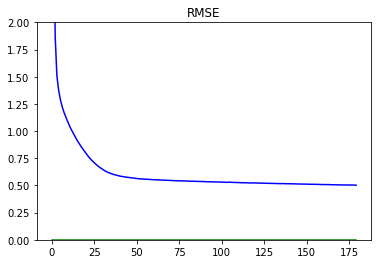

In [29]:
plot_metrics('wine_quality_root_mean_squared_error', 'RMSE', ylim=2)

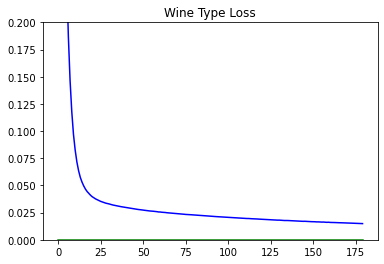

In [30]:
plot_metrics('wine_type_loss', 'Wine Type Loss', ylim=0.2)

C:\Users\Carmona\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  
C:\Users\Carmona\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


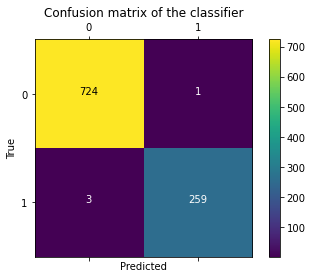

In [31]:
plot_confusion_matrix(test_Y[1], np.round(type_pred), title='Wine Type', labels = [0, 1])

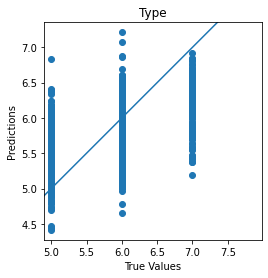

In [32]:
scatter_plot = plot_diff(test_Y[0], quality_pred, title='Type')